In [18]:
from IPython.core.magic import register_cell_magic

import sys
sys.path.append("../")
import numpy as np
import os
import glob
import cv2
import csv
from scipy.signal import find_peaks
from utils import KymoMomentum, KymoTime, ErrorMeassgeCats
import pandas as pd
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
from pathlib import Path
@register_cell_magic('CatPlease')
def handle(line, cell):
    try:
        exec(cell)
    except Exception as e:
        print("Your error is:", e)
        ErrorMeassgeCats()


Your error is: [Errno 2] No such file or directory: '/home/kapoorlab/Downloads'
https://res.cloudinary.com/twenty20/private_images/t_reshot-300/v1588713947/photosp/74503fc3-a607-4891-af58-661ec7b92b3b/74503fc3-a607-4891-af58-661ec7b92b3b.jpg


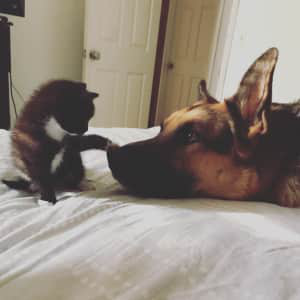

You have an error in the code, enjoy looking at this picture and contact your ground control to major Tom


In [19]:
%%CatPlease
Kymo = '/home/kapoorlab/Downloads/Darine/Dpachys_10/DistanceMethodCurvature_Dpachys_controlTrackID1.tif'
savedir = '/home/kapoorlab/Downloads/'
Path(savedir).mkdir(exist_ok = True)

Time_unit = 5
Xcalibration = 0.212
#Remove zero end of kymograph
cutEnd = 300
#This is what makes a peak a peak, the height of peaks around this main peak height threshold
Heightthreshold = 0.005



In [ ]:
Kymoimage = imread(Kymo)
Kymoimage = Kymoimage[:Kymoimage.shape[0]-cutEnd,:]
Name = os.path.basename(os.path.splitext(Kymo)[0])
peakKX = KymoMomentum(Kymoimage,Xcalibration,savedir, threshold = Heightthreshold)

peakWT = KymoTime(Kymoimage, Time_unit,savedir, threshold = Heightthreshold)

Velocity = 0
if peakKX > 0:
 Velocity = peakWT/peakKX

print("Estimated Velocity", Velocity, 'um/s')

df = pd.DataFrame([[Name,Velocity]],columns =['Experiment', 'Velocity'])
df.to_csv(savedir + Name + 'Velocity' +  '.csv', index = False)  